# 02: Data Visualization
In [notebook 1](/01-eda-fatallities.ipynb) we performed EDA on our data. In this notebook, we'll be using the cleaned data to create visuals of features and correlations that are relevant to building our ML model.  

---

## Data Visualization Plan
1. Import necessary python libraries.
2. Set up my custom "sunset melody" theme for all plots:
   - Set up a custom color palette using the specified colors
   - Configure seaborn to use the minimalist style with no borders or grids
3. Read [our cleaned data]('../data/cleaned_fatalities.csv') into pandas as a DataFrame.
4. Create visualisations of features and correlations relevant to ML model development:
     2. Fatalities by year (line chart)
     3. Fatalities by time of day (bar chart)
     4. Fatalities by age category and collision category (grouped bar chart)
     5. Heatmap of fatalities by month and day of week
     6. Geographic distribution of fatalities (scatter plot on map)
   - For each visualization:
     - Add appropriate titles and labels
     - Apply the sunset melody color scheme
     - Print corresponding data tables
5. Perform statistical analyses relevant to ML model development:
   - Analyze trends over time
   - Identify significant relationships between variables
---

## 1. Import necessary Python libraries.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # data visualization library
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns     # prettier data visualization library than matplotlib
from io import BytesIO     # From https://www.geeksforgeeks.org/stringio-and-bytesio-for-managing-data-as-file-object/#
import requests     # simple https library for python https://www.geeksforgeeks.org/python-requests-tutorial/
from datetime import datetime     # https://www.geeksforgeeks.org/python-datetime-module/
import re     # RegEx or Regular Expression library
import calendar
from scipy import stats

## 2. Set up my custom "sunset melody" theme for all plots.
I came up with a minimalist theme for readability and to minimize cognitive load while you visually interpret the data. The color scheme provides good contrast while maintaining aesthetic appeal, and the minimalist style keeps the focus on the data patterns.

In [35]:
# Set the style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style('white')

In [36]:
# Define my very own custom sunset color palette
sunset_melody = ['#252D6E',    # dark blue
                 '#6F5B96',    # purple
                 '#B3698A',    # mauve
                 '#F08A7B',    # salmon
                 '#FFA477']    # peach

sunset_cmap = LinearSegmentedColormap.from_list(sunset_melody, sunset_melody)
sns.set_palette(sunset_melody)

## 3. Read our cleaned data into pandas as a DataFrame.

In [37]:
# Read the cleaned data into pandas.
df = pd.read_csv('../data/fatality_data_processed.csv')
df.head()

,unique_id,case_id_fkey,latitude,longitude,collision_year,death_date,death_time,death_datetime,collision_date,collision_time,...,data_loaded_at,age_category,collision_category,collision_hour,time_of_day,collision_year_clean,collision_month,collision_day,day_of_week,high_risk
0,20250132,250074798,37.793223,-122.414470,2025,2025-02-07,NaN,2025-02-07 12:00:00,2025-02-07,16:27:00,...,2025-04-08 04:35:01,Adult (35-64),Motorcycle,16.0,Night (9pm-5am),2025,2,7,Friday,1
1,143,180060546,37.718555,-122.412859,2018,2018-01-23,13:10:00,2018-01-23 01:10:00,2018-01-23,13:09:00,...,2025-04-08 04:35:01,Young Adult (18-34),Vehicle,13.0,Night (9pm-5am),2018,1,23,Tuesday,1
2,269,200252819,37.752427,-122.394587,2020,2020-04-21,19:35:00,2020-04-21 07:35:00,2020-04-21,17:30:00,...,2025-04-08 04:35:01,Young Adult (18-34),Vehicle,17.0,Morning (5am-12pm),2020,4,21,Tuesday,0
3,37,150597717,37.746092,-122.502776,2015,2015-07-13,20:35:00,2015-07-13 08:35:00,2015-07-09,15:33:00,...,2025-04-08 04:35:01,Senior (65+),Vehicle,15.0,Night (9pm-5am),2015,7,9,Thursday,1
4,47,140564970,37.787548,-122.421758,2014,2014-07-08,06:13:00,2014-07-08 06:13:00,2014-07-08,01:49:00,...,2025-04-08 04:35:01,Adult (35-64),Motorcycle,1.0,Night (9pm-5am),2014,7,8,Tuesday,1


## 4. Create visualizations.
### A. Fatalities by Year, 2014-2025 (line chart)

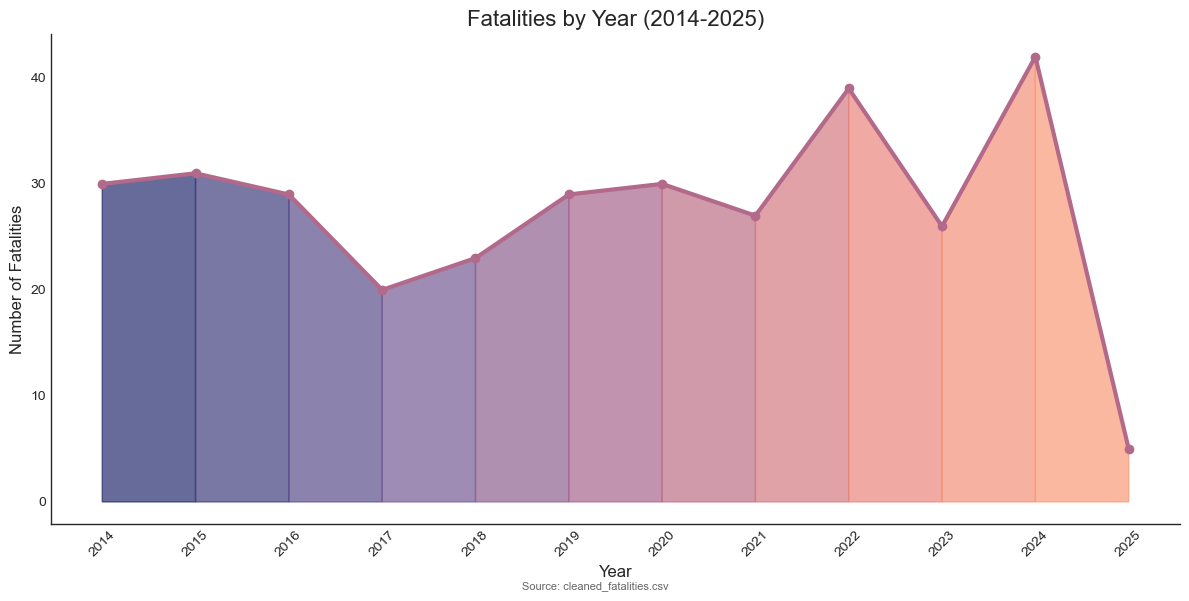



Fatalities by Year, 2014-2025:


    collision_year_clean  Count
0                   2014     30
1                   2015     31
2                   2016     29
3                   2017     20
4                   2018     23
5                   2019     29
6                   2020     30
7                   2021     27
8                   2022     39
9                   2023     26
10                  2024     42
11                  2025      5




In [38]:
# A. Fatalities by year (line chart)
plt.figure(figsize = (12, 6))
year_counts = df.groupby('collision_year_clean').size().reset_index(name = 'Count')

# Create the line chart
plt.plot(year_counts['collision_year_clean'], 
         year_counts['Count'], 
         marker = 'o', 
         linewidth = 3, 
         color = sunset_melody[2]
        )

# Create gradient fill under the curve
x = year_counts['collision_year_clean']
y = year_counts['Count']

# For each x segment, create a polygon with gradient fill
for i in range(len(x)-1):
    # Create points for the polygon
    x_segment = [x[i], x[i+1], x[i+1], x[i]]
    y_segment = [y[i], y[i+1], 0, 0]
    
    # Calculate the color position in the gradient (0 to 1)
    color_pos = i / (len(x)-1)
    
    # Fill the polygon with the color from the gradient
    plt.fill(x_segment, y_segment, color = sunset_cmap(color_pos), alpha = 0.7)

# Add labels and title
plt.title('Fatalities by Year (2014-2025)', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)
plt.grid(False)

# Set x-axis ticks to show all years
plt.xticks(year_counts['collision_year_clean'], rotation = 45)

# Remove spines
sns.despine()

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print the table
print('\n')
print('Fatalities by Year, 2014-2025:')
print('\n')
print(year_counts)
print('\n')

### B. Fatal Collisions by Hour of Day, 2014-2025 (bar chart)

NameError: name 'ColorbarBase' is not defined

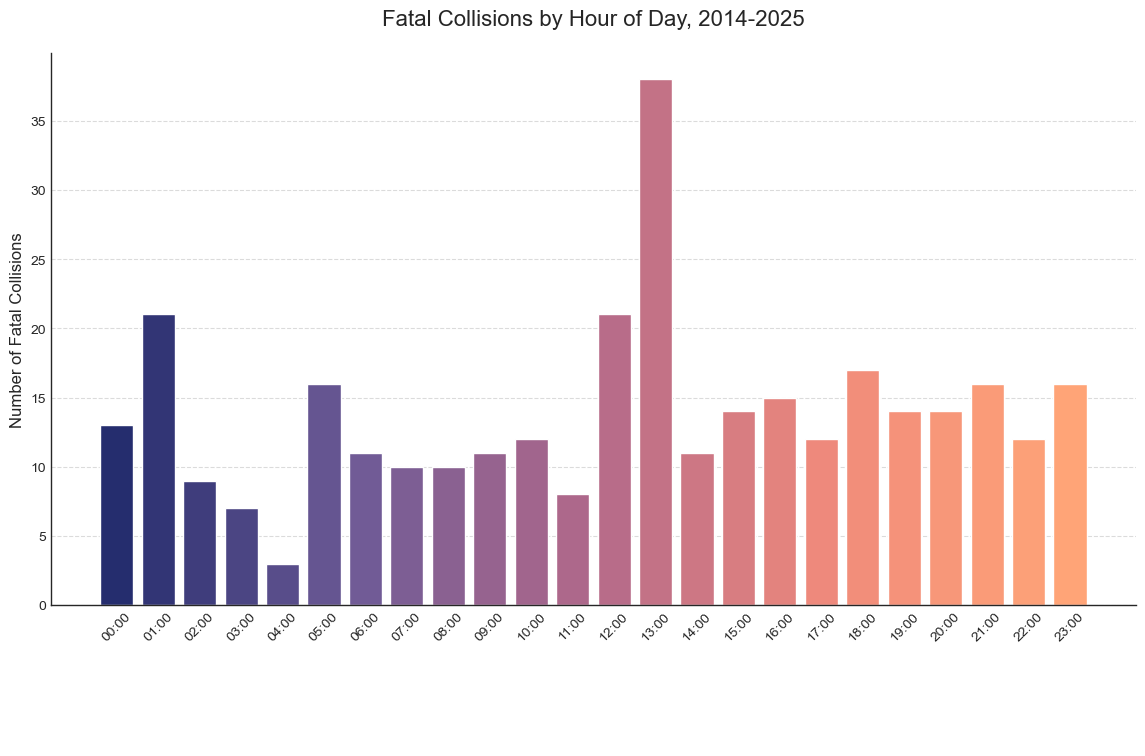

In [49]:
# B. Fatalities by hour of day
# Create a colormap from the sunset melody colors
cmap = mcolors.LinearSegmentedColormap.from_list('sunset_melody', sunset_melody)

# Create color array based on hour position
colors = cmap(np.linspace(0, 1, 24))

# Create a figure with appropriate size
fig = plt.figure(figsize=(14, 9))  # Increased height to accommodate all elements
hour_counts = df.groupby('collision_hour').size().reset_index(name = 'Count')

# Create the main axis for the bar chart (notice we're not using gridspec here)
ax = plt.subplot2grid((10, 1), (0, 0), rowspan=8)  # Main plot takes 8/10 of the height

# Create the bar chart with gradient colors
bars = ax.bar(hour_counts['collision_hour'], hour_counts['Count'], color=colors, width=0.8)

# Format x-axis with hour labels (00:00, 01:00, etc.)
hour_labels = [f'{h:02d}:00' for h in range(24)]
ax.set_xticks(range(24))
ax.set_xticklabels(hour_labels, rotation=45)

# Set title and labels
ax.set_title('Fatal Collisions by Hour of Day, 2014-2025', fontsize = 16, pad = 20)
ax.set_xlabel('')
ax.set_ylabel('Number of Fatal Collisions', fontsize = 12)

# Set y-axis to start at 0
ax.set_ylim(bottom = 0)

# Add horizontal grid lines with dashed style
ax.yaxis.grid(True, linestyle = '--', alpha = 0.7)
ax.set_axisbelow(True)  # Place gridlines behind bars

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a colorbar in a separate subplot below the main plot
cbar_ax = plt.subplot2grid((10, 1), (9, 0), rowspan = 1)  # Colorbar takes bottom row
cbar_ax.set_axis_off()  # Hide the axis of the colorbar
ColorbarBase(cbar_ax, cmap=cmap, orientation = 'horizontal')

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', 
            ha = 'center', fontsize = 10)

# Adjust the layout with more space between elements
plt.subplots_adjust(bottom = 0.1, hspace = 0.1)

plt.show()

# Print the table
print('\nFatal Collisions by Hour of Day, 2014-2025:\n')
print(hour_counts)

### C. Fatalities by Time of Day, 2014-2025 (bar chart)

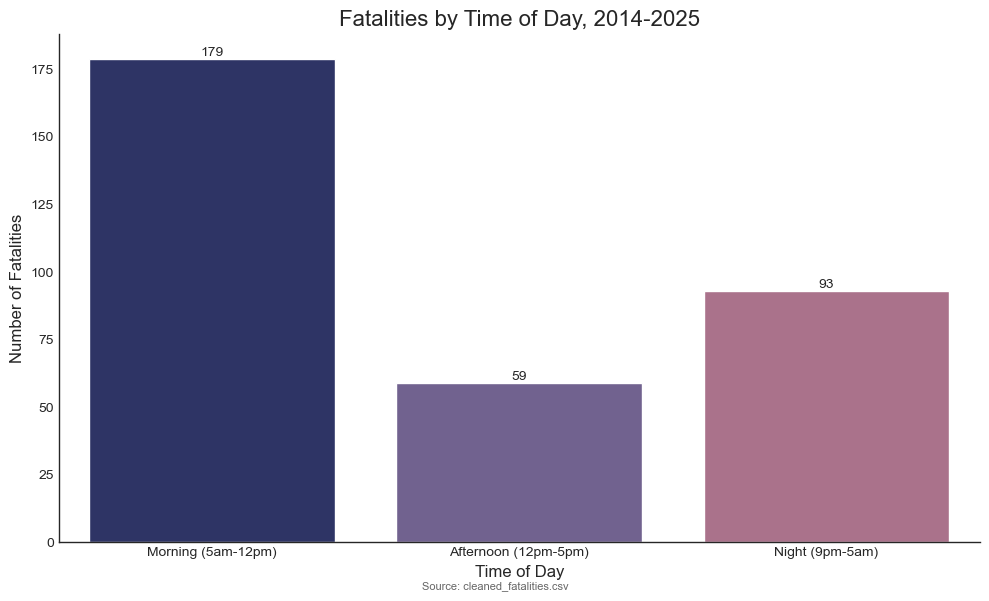


Fatalities by Time of Day, 2014-2025:

            Time of Day  Count
0    Morning (5am-12pm)    179
2  Afternoon (12pm-5pm)     59
1       Night (9pm-5am)     93




In [53]:
# C. Fatalities by time of day (bar chart)
plt.figure(figsize = (10, 6))
time_counts = df['time_of_day'].value_counts().reset_index()
time_counts.columns = ['Time of Day', 'Count']

# Sort by a logical order of time
time_order = ['Morning (5am-12pm)', 'Afternoon (12pm-5pm)', 'Night (9pm-5am)']
time_counts['Time of Day'] = pd.Categorical(time_counts['Time of Day'], categories = time_order, ordered = True)
time_counts = time_counts.sort_values('Time of Day')

# Create the bar chart
ax = sns.barplot(
    x = 'Time of Day',
    y = 'Count', 
    data = time_counts,
    hue='Time of Day',  # Add hue parameter
    palette=sunset_melody[:3],  # Limit palette to only 3 colors (matching categories)
    legend=False  # Hide the legend since it's redundant
)

# Add labels and title
plt.title('Fatalities by Time of Day, 2014-2025', fontsize = 16)
plt.xlabel('Time of Day', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)

# Remove spines
sns.despine(left = False, bottom = False)

# Add text labels on top of bars
for i, v in enumerate(time_counts['Count']):
    ax.text(i, v + 1, str(v), ha = 'center', fontsize = 10)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print the table
print('\nFatalities by Time of Day, 2014-2025:\n')
print(time_counts)
print('\n')

### D. Fatalities by Victim Type, 2014-2025 (bar chart)

In [54]:
# D. Fatalities by Victim Type
# Create the plot
plt.figure(figsize=(12, 8))
victim_types = df.groupby('deceased').size().reset_index(name = 'Count')
yearly_counts = df.groupby('collision_year_clean').size().reset_index(name = 'Count')

# Plot each victim type
for i, victim in enumerate(victim_types):
    plt.plot(yearly_counts['collision_year_clean'], yearly_counts[victim], 
             marker='o', 
             linewidth=2.5 if victim == 'Pedestrian' else 2,
             color=sunset_melody[i % len(sunset_melody)],
             label=victim)

# Customize the plot
plt.title('Fatalities by Victim Type (2014-2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.xticks(yearly_counts['year'], rotation=45)
plt.ylim(bottom=0)
plt.legend(title='Victim Type', loc='upper right')

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha='center', fontsize=10)

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()

# Print the table
print('\nFatalities by Victim Type 2014-2025:\n')
print(victim_types)
print('\n')

KeyError: 'deceased'

<Figure size 1200x800 with 0 Axes>

### E. Fatalities by Age Category and Collision Category (grouped bar chart)

<Figure size 1200x700 with 0 Axes>

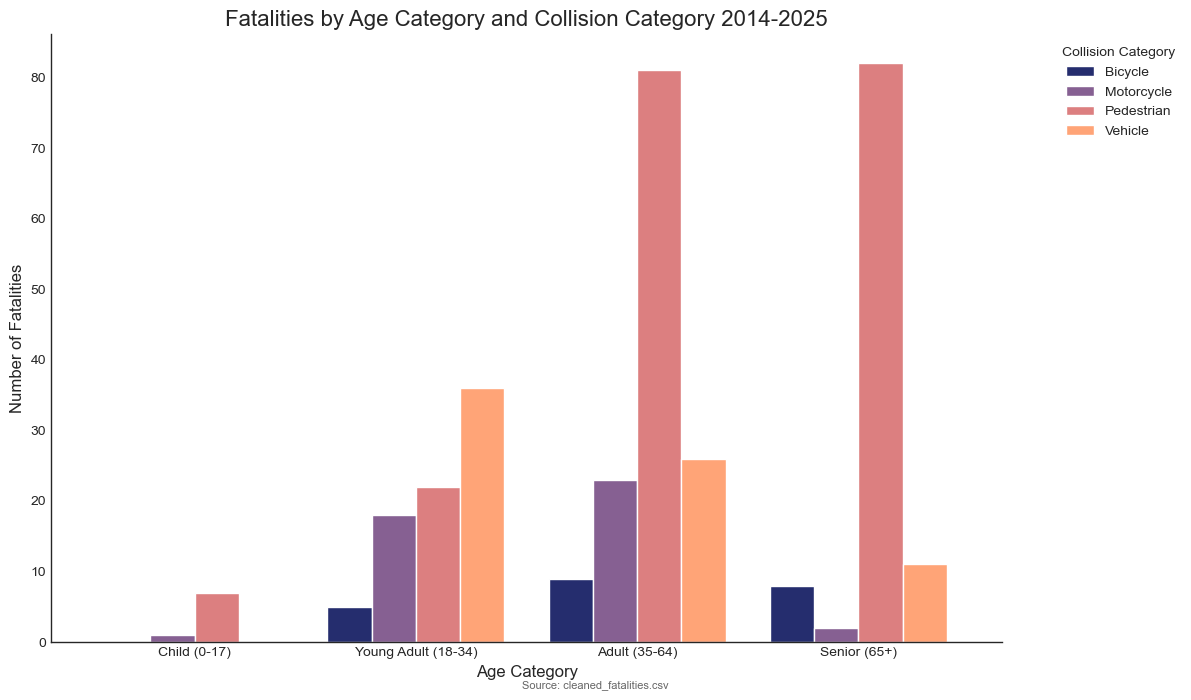



Fatalities by Age Category and Collision Category, 2014-2025:


collision_category   Bicycle  Motorcycle  Pedestrian  Vehicle
age_category                                                 
Child (0-17)               0           1           7        0
Young Adult (18-34)        5          18          22       36
Adult (35-64)              9          23          81       26
Senior (65+)               8           2          82       11




In [55]:
# E. Fatalities by age category and collision category (grouped bar chart)
plt.figure(figsize = (12, 7))
age_collision = pd.crosstab(df['age_category'], df['collision_category'])

# Sort age categories in a logical order
age_order = ['Child (0-17)', 'Young Adult (18-34)', 'Adult (35-64)', 'Senior (65+)']
age_collision = age_collision.reindex(age_order)

# Create the grouped bar chart
ax = age_collision.plot(kind = 'bar', figsize = (12, 7), width = 0.8, colormap = sunset_cmap)

# Add labels and title
plt.title('Fatalities by Age Category and Collision Category 2014-2025', fontsize = 16)
plt.xlabel('Age Category', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)
plt.xticks(rotation = 0)
plt.legend(title = 'Collision Category', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Remove spines
sns.despine(left = False, bottom = False)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print the table
print('\n')
print('Fatalities by Age Category and Collision Category, 2014-2025:')
print('\n')
print(age_collision)
print('\n')

### F. Age Distribution by Victim Type (box chart)

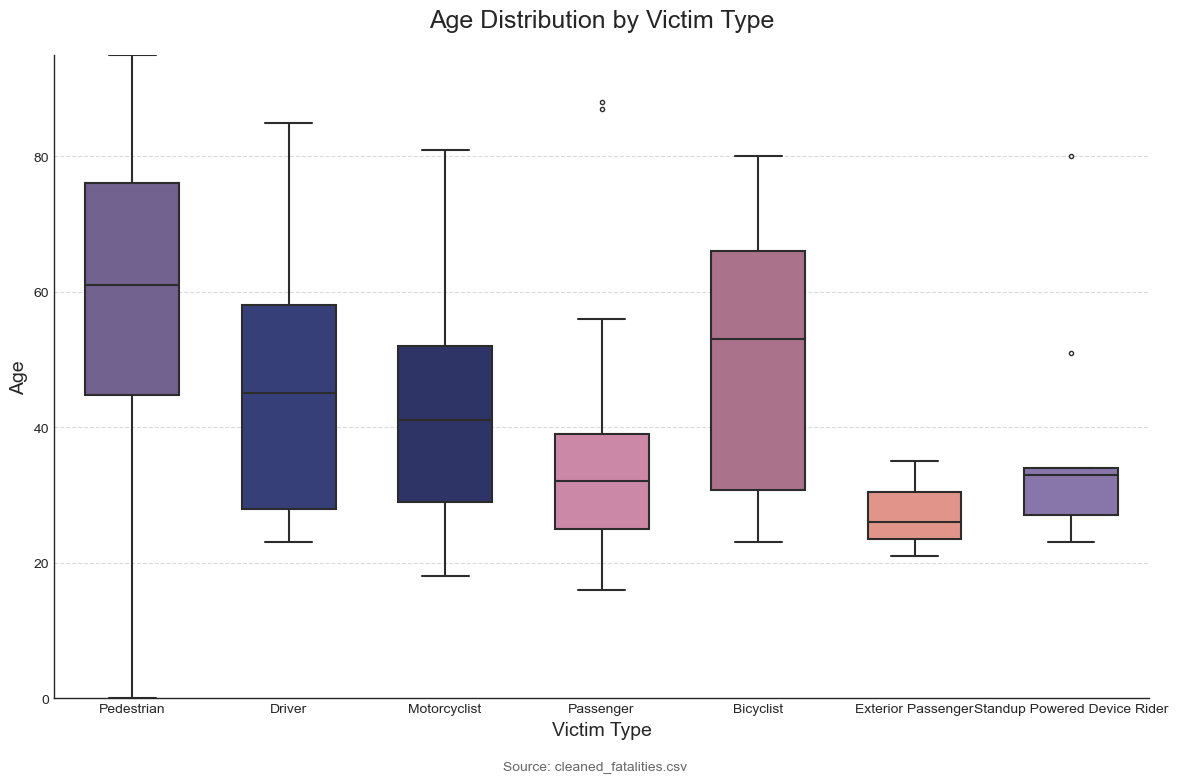


Age Distribution by Victim Type, 2014-2025:

0      Motorcyclist
1            Driver
2            Driver
3            Driver
4      Motorcyclist
           ...     
326      Pedestrian
327      Pedestrian
328      Pedestrian
329      Pedestrian
330      Pedestrian
Name: deceased, Length: 331, dtype: object




In [58]:
# F. Age distribution by victim type
# Create a custom palette with enough colors for all victim types
# We'll cycle through the sunset melody colors and create variations
extended_palette = []
for color in sunset_melody:
    extended_palette.append(color)
    # Add a slightly lighter version of each color
    r, g, b = mcolors.to_rgb(color)
    lighter_color = (min(1, r*1.2), min(1, g*1.2), min(1, b*1.2))
    extended_palette.append(lighter_color)

# Create figure and axis
plt.figure(figsize=(12, 8))

# Define the order of victim types to match the image
victim_order = ['Pedestrian', 'Driver', 'Motorcyclist', 'Passenger', 
                'Bicyclist', 'Exterior Passenger', 'Standup Powered Device Rider']

# Create the box plot with ordered categories
ax = sns.boxplot(
    x='deceased',
    y='age',
    data=df,
    order=victim_order,  # Specify the order here
    hue='deceased',  # Add hue parameter
    palette=extended_palette[:8],  # Limit palette to number of categories
    width=0.6,
    fliersize=3,
    linewidth=1.5
)

# Set title and labels
plt.title('Age Distribution by Victim Type', fontsize=18, pad=20)
plt.xlabel('Victim Type', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Set y-axis limits
plt.ylim(0, 95)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine()

# Adjust tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', 
            ha='center', fontsize=10, alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

plt.show()

# Print the table
print('\nAge Distribution by Victim Type, 2014-2025:\n')
print(df['deceased'])
print('\n')

### G. Distribution of Fatalities by Sex, 2014-2025 (bar chart)

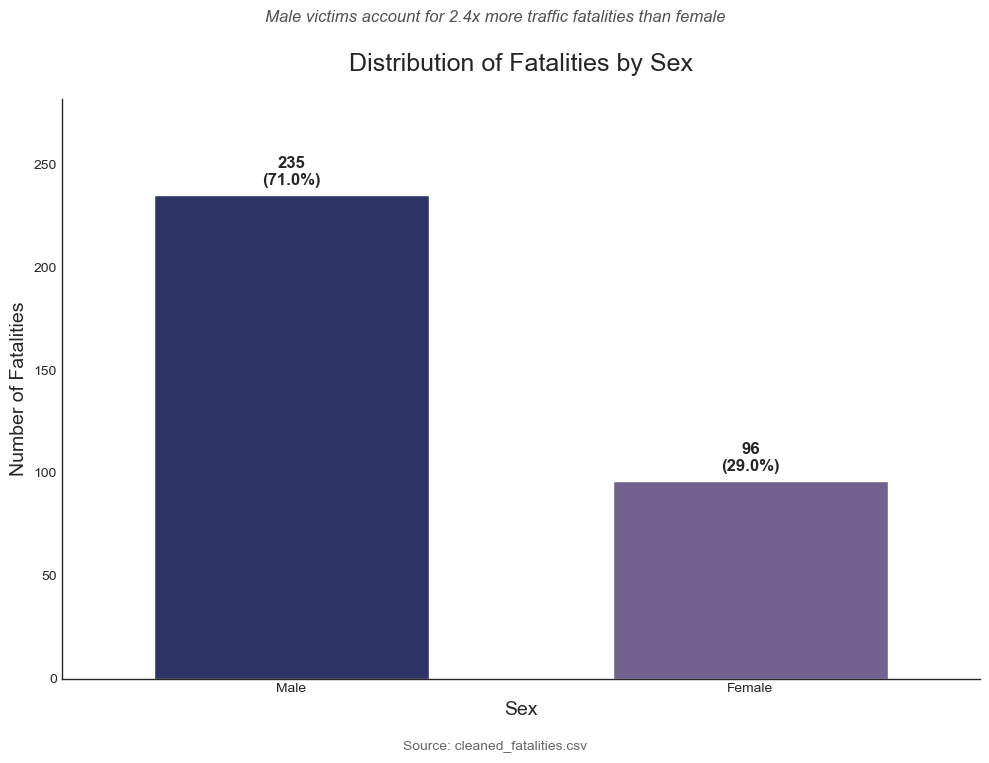


Distribution of Fatalities by Sex, 2014-2025:

      Sex  Count  Percentage
0    Male    235        71.0
1  Female     96        29.0




In [63]:
# G. Count fatalities by sex
sex_counts = df['sex'].value_counts().reset_index()
sex_counts.columns = ['Sex', 'Count']

# Calculate percentages
total = sex_counts['Count'].sum()
sex_counts['Percentage'] = (sex_counts['Count'] / total * 100).round(1)

# Create figure and axis
plt.figure(figsize=(10, 8))

# Create the bar chart
ax = sns.barplot(
    x='Sex',
    y='Count',
    data=sex_counts,
    palette=sunset_melody[:2],
    hue = 'Sex',
    width=0.6
)

# Add count and percentage labels on top of bars
for i, row in sex_counts.iterrows():
    ax.text(
        i, 
        row['Count'] + 5,  # Position text 5 units above the bar
        f"{int(row['Count'])}\n({row['Percentage']}%)",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# Set title and labels
plt.title('Distribution of Fatalities by Sex', fontsize=18, pad=20)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)

# Set y-axis to start at 0 with some headroom for labels
plt.ylim(0, max(sex_counts['Count']) * 1.2)

# Remove spines
sns.despine()

# Add source information
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', 
            ha='center', fontsize=10, alpha=0.7)

# Add a brief annotation explaining the disparity
if len(sex_counts) >= 2 and sex_counts.iloc[0]['Count'] > sex_counts.iloc[1]['Count']:
    dominant_sex = sex_counts.iloc[0]['Sex']
    ratio = round(sex_counts.iloc[0]['Count'] / sex_counts.iloc[1]['Count'], 1)
    plt.figtext(
        0.5, 0.92,
        f"Male victims account for {ratio}x more traffic fatalities than female",
        ha='center', fontsize=12, style='italic', alpha=0.8
    )

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()

# Print the table
print('\nDistribution of Fatalities by Sex, 2014-2025:\n')
print(sex_counts)
print('\n')

### H. Distribution of Fatalities by Collision Category, 2014-2025 (bar chart)

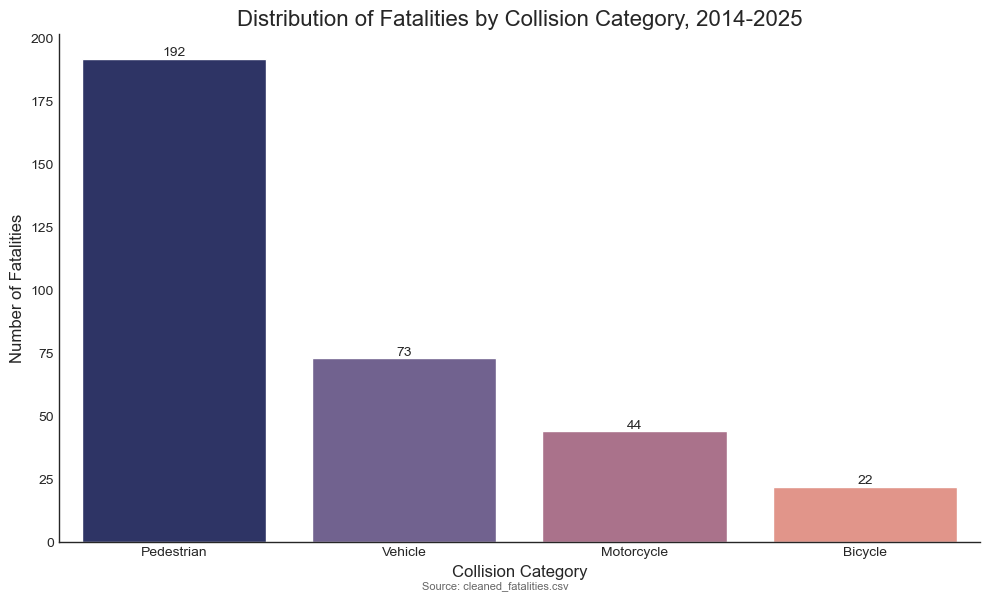



Distribution of Fatalities by Collision Category 2014-2025:


  Collision Category  Count
0         Pedestrian    192
1            Vehicle     73
2         Motorcycle     44
3            Bicycle     22




In [64]:
# H. Distribution of fatalities by collision category (bar chart)
plt.figure(figsize = (10, 6))
collision_counts = df['collision_category'].value_counts().reset_index()
collision_counts.columns = ['Collision Category', 'Count']

# Create the bar chart
ax = sns.barplot(
    x = 'Collision Category',
    y = 'Count', 
    data = collision_counts,
    hue = 'Collision Category',  # Add hue parameter
    palette = sunset_melody[:4],  # Limit palette to only 4 colors (matching categories)
    legend = False  # Hide the legend since it's redundant
    )

# Add labels and title
plt.title('Distribution of Fatalities by Collision Category, 2014-2025', fontsize = 16)
plt.xlabel('Collision Category', fontsize = 12)
plt.ylabel('Number of Fatalities', fontsize = 12)
plt.xticks(rotation = 0)

# Remove spines
sns.despine(left = False, bottom = False)

# Add text labels on top of bars
for i, v in enumerate(collision_counts['Count']):
    ax.text(i, v + 1, str(v), ha = 'center', fontsize = 10)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print the table
print('\n')
print('Distribution of Fatalities by Collision Category 2014-2025:')
print('\n')
print(collision_counts)
print('\n')

### I. Geographic Distribution of Fatalities, 2014-2025 (scatter plot on map)

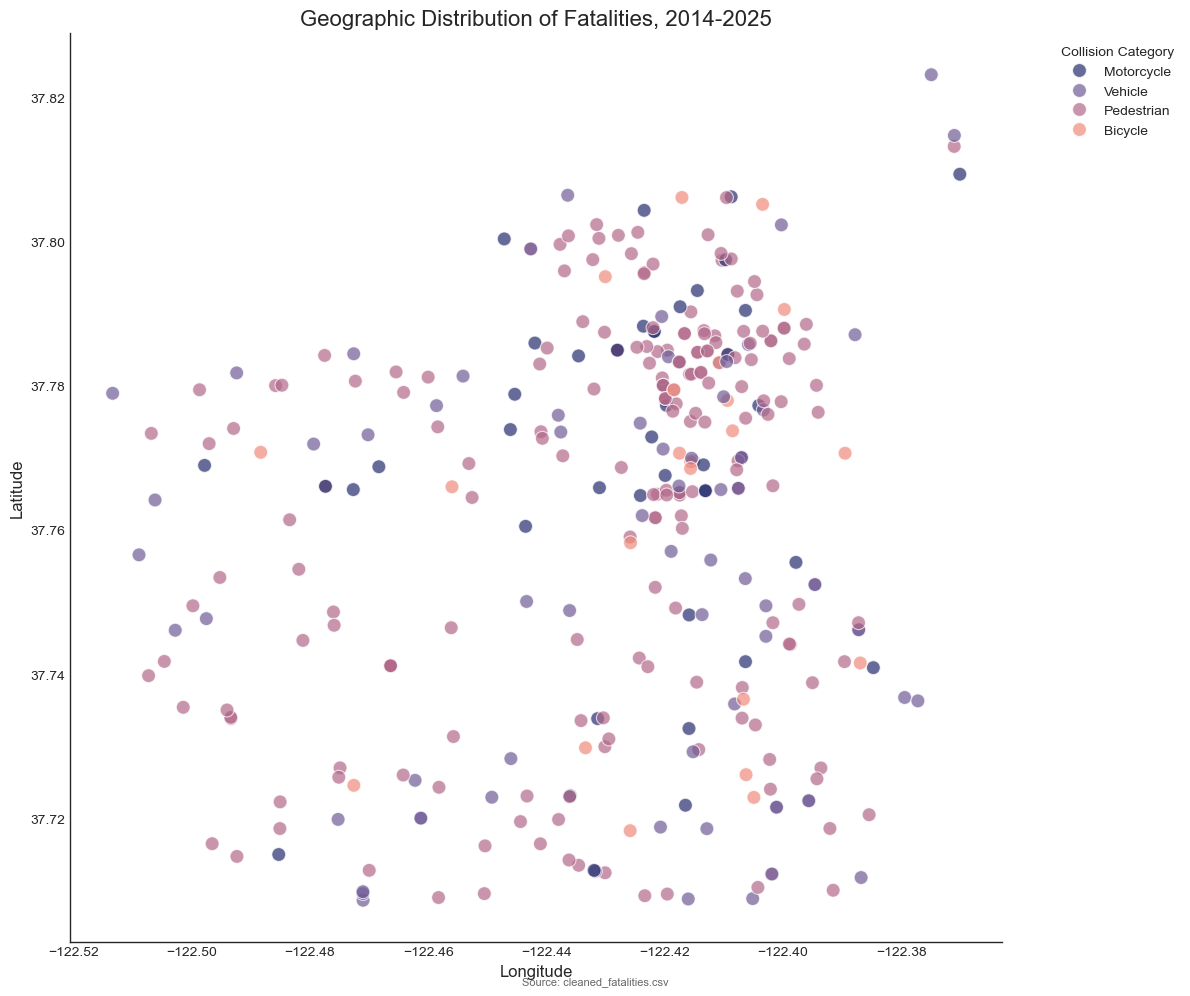


Geographic Distribution Summary Statistics, 2014-2025:


         latitude   longitude
count  331.000000  331.000000
mean    37.762136 -122.428658
std      0.027593    0.030399
min     37.708628 -122.513360
25%     37.740341 -122.442294
50%     37.769036 -122.419883
75%     37.783967 -122.407654
max     37.823175 -122.370075




In [67]:
# I. Geographic distribution of fatalities (scatter plot on map)
plt.figure(figsize = (12, 10))

# Create a scatter plot colored by collision category
scatter = sns.scatterplot(
    x = 'longitude', 
    y = 'latitude', 
    hue = 'collision_category',
    palette = sunset_melody [:4],
    s = 100,
    alpha = 0.7,
    data = df
)

# Add labels and title
plt.title('Geographic Distribution of Fatalities, 2014-2025', fontsize = 16)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel('Latitude', fontsize = 12)
plt.legend(title = 'Collision Category', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Remove spines and grid
sns.despine()
plt.grid(False)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print summary statistics for geographic coordinates
print('\nGeographic Distribution Summary Statistics, 2014-2025:')
geo_stats = df[['latitude', 'longitude']].describe()
print('\n')
print(geo_stats)
print('\n')

### J. Heatmap of Fatalities by Month and Day of the Week, 2014-2025 (heatmap)

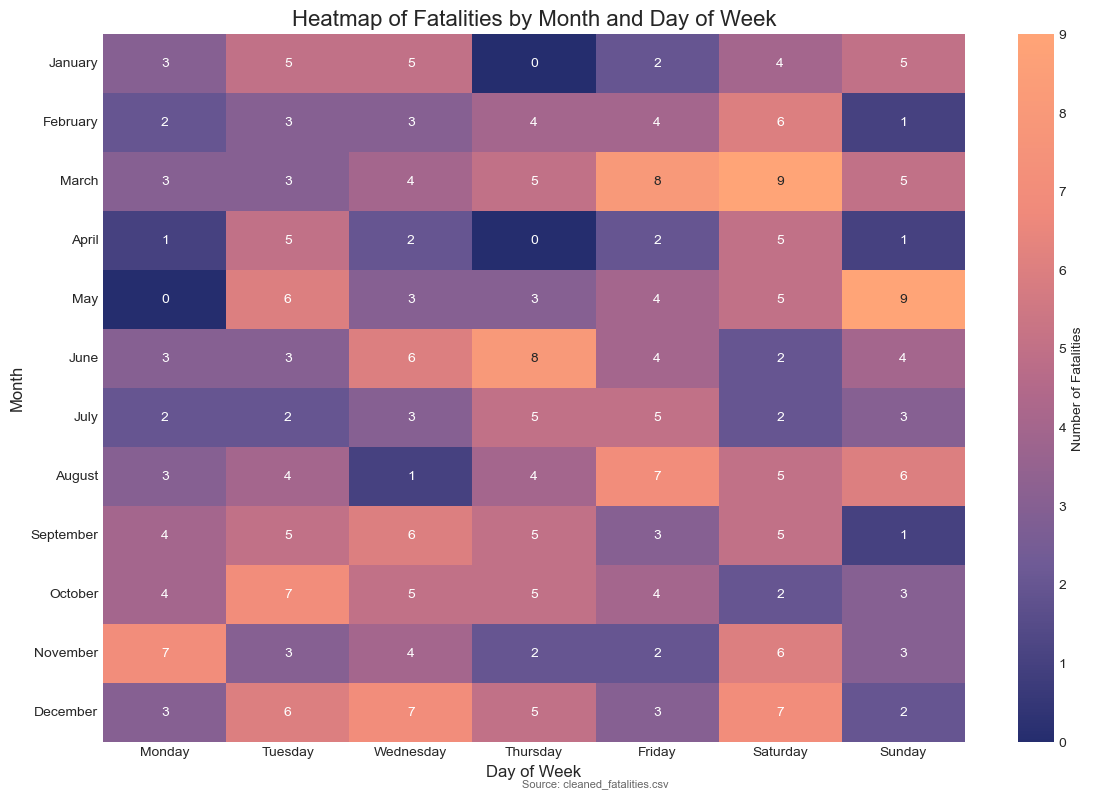


Fatalities by Month and Day of Week, 2014-2025:

day_name    Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
month_name                                                                
January          3        5          5         0       2         4       5
February         2        3          3         4       4         6       1
March            3        3          4         5       8         9       5
April            1        5          2         0       2         5       1
May              0        6          3         3       4         5       9
June             3        3          6         8       4         2       4
July             2        2          3         5       5         2       3
August           3        4          1         4       7         5       6
September        4        5          6         5       3         5       1
October          4        7          5         5       4         2       3
November         7        3          4         2  

In [71]:
# J. Heatmap of fatalities by month and day of week
plt.figure(figsize = (12, 8))

# First convert collision_date to datetime if it's not already
df['collision_date'] = pd.to_datetime(df['collision_date'], errors = 'coerce')

# Extract month and day of week
df['month_name'] = df['collision_date'].dt.month_name()
df['day_name'] = df['collision_date'].dt.day_name()  # Add this line if day_name isn't already created

# Create a crosstab of month and day of week
month_day_counts = pd.crosstab(df['month_name'], df['day_name'])

# Reorder months and days
month_order = list(calendar.month_name)[1:]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_day_counts = month_day_counts.reindex(month_order).reindex(columns = day_order)

# Create the heatmap
ax = sns.heatmap(month_day_counts, cmap = sunset_cmap, annot = True, fmt = 'd', linewidths = 0, cbar_kws = {'label': 'Number of Fatalities'})

# Add labels and title
plt.title('Heatmap of Fatalities by Month and Day of Week', fontsize = 16)
plt.xlabel('Day of Week', fontsize = 12)
plt.ylabel('Month', fontsize = 12)

plt.tight_layout()
plt.figtext(0.5, 0.01, 'Source: cleaned_fatalities.csv', ha = 'center', fontsize = 8, alpha = 0.7)
plt.show()

# Print the table
print('\nFatalities by Month and Day of Week, 2014-2025:\n')
print(month_day_counts)
print('\n')

In [ ]:
# Statistical Analysis 1: Chi-square test for association between collision category and time of day
print('Statistical Analysis 1: Association between Collision Category and Time of Day')
contingency_table = pd.crosstab(df['collision_category'], df['time_of_day'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Contingency Table:\n{contingency_table}')
print(f'Chi-square statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')
print(f'Degrees of freedom: {dof}')
if p < 0.05:
    print('There is a significant association between collision category and time of day (p < 0.05)')
else:
    print('There is no significant association between collision category and time of day (p >= 0.05)')
print('\n')

In [ ]:
# Statistical Analysis 2: ANOVA test for age differences across collision categories
print('Statistical Analysis 2: Age Differences Across Collision Categories')
categories = df['collision_category'].unique()
age_by_category = [df[df['collision_category'] == cat]['age'].dropna() for cat in categories]
f_stat, p_val = stats.f_oneway(*age_by_category)
print(f'ANOVA F-statistic: {f_stat:.2f}')
print(f'p-value: {p_val:.4f}')
if p_val < 0.05:
    print('There are significant differences in age across collision categories (p < 0.05)')
else:
    print('There are no significant differences in age across collision categories (p >= 0.05)')

# Print mean age by collision category
age_means = df.groupby('collision_category')['age'].mean().reset_index()
age_means.columns = ['Collision Category', 'Mean Age']
print('\nMean Age by Collision Category:')
print(age_means)